# Geodaten konvertieren

**Inhalt:** Übung zum Basic Handling von Geodaten

**Nötige Skills**
- Basic pandas skills
- Funktionen und pandas
- Erste Schritte mit Geopandas

## Setup

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString

## Shapefile

Als Background dient uns das bekannte Shapefile der CH-Kantone

In [2]:
gdf_kantone = gpd.read_file('dataprojects/Projections/shp/g1k17.shp', encoding='utf-8')

<AxesSubplot:>

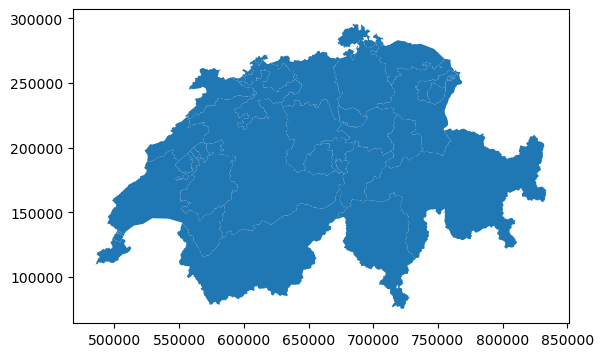

In [3]:
gdf_kantone.plot()

## 1. Beginner

Im ersten Teil der Übung geht es um die Basics. Wir benutzen ein vorgefertigtes Datenset.

Eine Liste von ziemlich zufälligen Objekten, die es in der Schwiez gibt
- Daten stammen von hier: https://data.world/geonames/switzerland-geographic-feature-names/workspace/intro
- Daten sind abgelegt im Ordner `dataprojects/Diverse Geodaten`

Typen von Objekten
- Bahnhöfe
- Gletscher
- Golfplätze
- Klöster
- Kraftwerke
- Raiffeisenbanken

**Ziel:**
- Daten ins CH-Koordinatensystem umprojezieren
- Daten auf einer Schweizer Karte plotten

### Schritt 1: Daten laden

Wähle eines der Excelfiles aus und öffne es. Wo befinden sich die relevanten Geoinformationen? In welchem Koordinatensystem sind sie codiert?

In [4]:
df = pd.read_excel("dataprojects/Diverse Geodaten/Golfplätze.xlsx")

In [5]:
df.head()

geonameid                   name               asciiname  \
0    6615367  Golfplatz Schönenberg  Golfplatz Schoenenberg   
1    6618752    Minigolf Morgenthal     Minigolf Morgenthal   
2   11217360               Bessinge                Bessinge   
3   12005272      Swin-Golf Tschugg       Swin-Golf Tschugg   
4   12005273   Swin-Golf Les Bulles    Swin-Golf Les Bulles   

         alternatenames  latitude  longitude feature class feature code  \
0                   NaN  47.20538    8.62780             S         RECG   
1                   NaN  47.21493    8.61071             S         RECG   
2              Bessinge  46.22243    6.19180             S         RECG   
3     Swin-Golf Tschugg  47.02191    7.07606             S         RECG   
4  Swin-Golf Les Bulles  47.12687    6.82912             S         RECG   

  country code  cc2 admin1 code  admin2 code  admin3 code  admin4 code  \
0           CH  NaN          ZH        106.0        293.0          NaN   
1           CH  NaN          ZH        106.0        295.0          NaN   
2           CH  NaN          GE       2500.0       6642.0          NaN   
3           CH  NaN          BE          NaN          NaN          NaN   
4           CH  NaN          JU          NaN          NaN          NaN   

   population  elevation   dem       timezone modification date  
0           0      670.0   670  Europe/Zurich        2019-01-13  
1           0      675.0   676  Europe/Zurich        2018-12-08  
2           0        NaN   494  Europe/Zurich        2017-07-27  
3           0        NaN   463  Europe/Zurich        2019-01-12  
4           0        NaN  1053  Europe/Zurich        2019-01-12

In [6]:
# Die Geodaten sind in den Spalten "latitude" und "longitude".
# Koordinatensystem: GPS-Koordinagen (EPSG 4326)

### Schritt 2: Geodataframe erstellen

Bringe die Daten von einem Pandas-Dataframe in Geopandas-Geodataframe. Initialisiere das GFD mit dem richtigen CRS.

In [7]:
df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

/Users/simon/opt/anaconda3/envs/CAS-Datenjournalismus-22/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [16]:
gdf = gpd.GeoDataFrame(df, geometry="geometry")

In [17]:
gdf = gdf.set_crs('epsg:4326')

In [18]:
gdf.head(2)

geonameid                   name               asciiname alternatenames  \
0    6615367  Golfplatz Schönenberg  Golfplatz Schoenenberg            NaN   
1    6618752    Minigolf Morgenthal     Minigolf Morgenthal            NaN   

   latitude  longitude feature class feature code country code  cc2  \
0  47.20538    8.62780             S         RECG           CH  NaN   
1  47.21493    8.61071             S         RECG           CH  NaN   

  admin1 code  admin2 code  admin3 code  admin4 code  population  elevation  \
0          ZH        106.0        293.0          NaN           0      670.0   
1          ZH        106.0        295.0          NaN           0      675.0   

   dem       timezone modification date                  geometry  
0  670  Europe/Zurich        2019-01-13  POINT (8.62780 47.20538)  
1  676  Europe/Zurich        2018-12-08  POINT (8.61071 47.21493)

### Schritt 3: Geodaten reprojizieren

Transformiere die Geodaten in das Koordinatensystem, das zum Shapefile mit den Kantonen passt.

In [19]:
gdf = gdf.to_crs(gdf_kantone.crs)

In [20]:
gdf.crs

<Compound CRS: COMPD_CS["CH1903 / LV03 + LN02 height",PROJCS["CH1 ...>
Name: CH1903 / LV03 + LN02 height
Axis Info [cartesian|vertical]:
- [east]: Easting (metre)
- [north]: Northing (metre)
- [up]: Gravity-related height (metre)
Area of Use:
- undefined
Datum: CH1903
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich
Sub CRS:
- CH1903 / LV03
- LN02 height

In [21]:
gdf.head(2)

geonameid                   name               asciiname alternatenames  \
0    6615367  Golfplatz Schönenberg  Golfplatz Schoenenberg            NaN   
1    6618752    Minigolf Morgenthal     Minigolf Morgenthal            NaN   

   latitude  longitude feature class feature code country code  cc2  \
0  47.20538    8.62780             S         RECG           CH  NaN   
1  47.21493    8.61071             S         RECG           CH  NaN   

  admin1 code  admin2 code  admin3 code  admin4 code  population  elevation  \
0          ZH        106.0        293.0          NaN           0      670.0   
1          ZH        106.0        295.0          NaN           0      675.0   

   dem       timezone modification date                       geometry  
0  670  Europe/Zurich        2019-01-13  POINT (690094.648 228953.296)  
1  676  Europe/Zurich        2018-12-08  POINT (688784.105 229995.437)

### Schritt 4: Karte erstellen

Plotte nun die Geodaten auf der Schweizerkarte. Formatiere den Plot (Farben, Punktgrössen, etc.)

Text(0.5, 1.0, 'Golfplätze in der Schweiz')

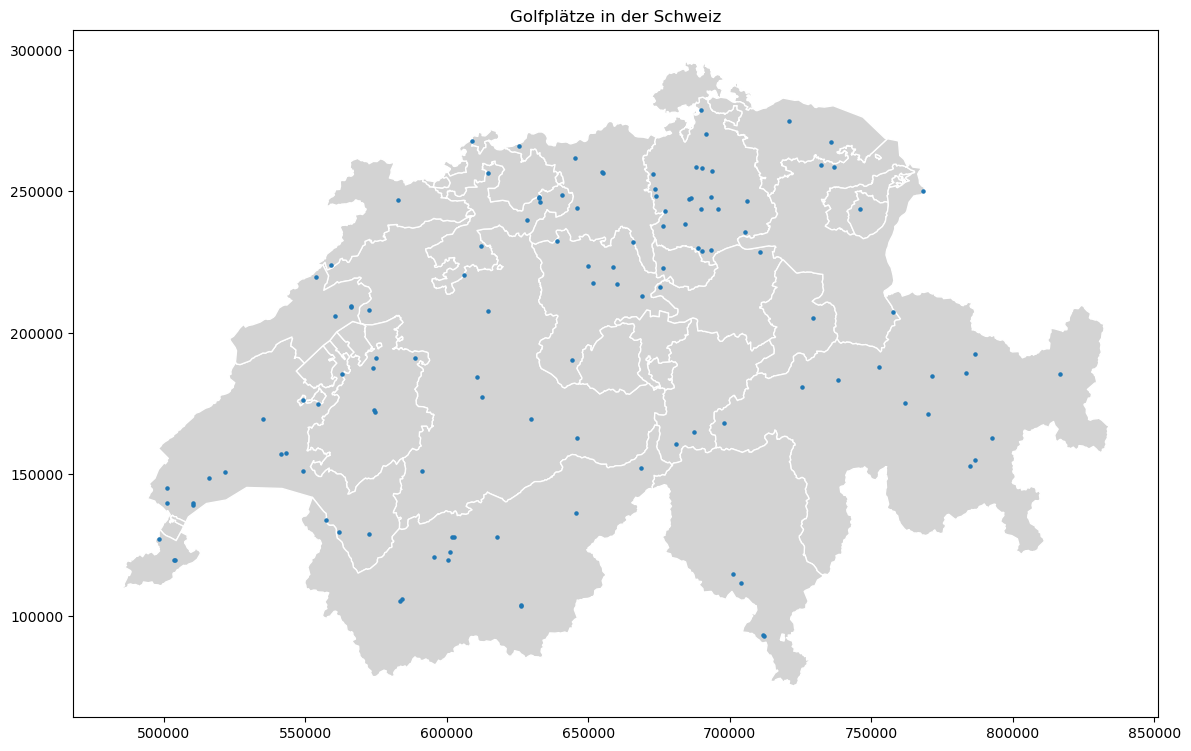

In [22]:
ax = gdf_kantone.plot(figsize=(14,10), color='lightgrey', edgecolor='white')
gdf.plot(markersize=5, ax=ax)
ax.set_title("Golfplätze in der Schweiz")

### Schritt 5 (Bonus): Auszählung je nach Kanton

Zähle aus, wie viele Elemente (Gletscher, Golfplätze, ...) es je nach Kanton gibt. Zeichne einen passenden Plot dazu.

In [23]:
gdf_merged = gpd.sjoin(gdf, gdf_kantone, how='left', predicate='within')

In [25]:
df_anzahl = gdf_merged['KTNAME'].value_counts().to_frame().rename(columns={'KTNAME': 'Anzahl'})

In [26]:
gdf_kantone_anzahl = gdf_kantone.merge(df_anzahl, how='inner', left_on='KTNAME', right_index=True)

<AxesSubplot:>

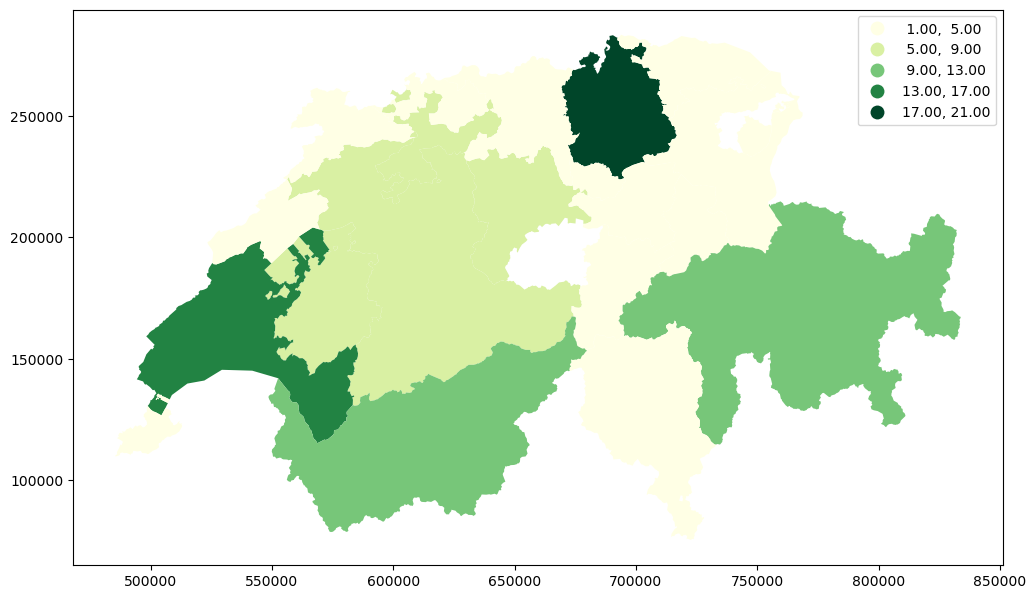

In [28]:
gdf_kantone_anzahl.plot(column='Anzahl', cmap='YlGn', scheme='equal_interval', figsize=(12,12), legend=True)

## 2. Advanced

Im zweiten Teil der Übung ziehen wir Daten vom Internet. Der Challenge liegt darin, dass wir diese Daten erst in eine tabellarische Form bringen müssen, bevor wir sie weiter verwenden können.

Wähle eine der folgenden Quellen aus:
- Bundesamt für Energie, Auto-Ladestationen: [Beschreibung](https://opendata.swiss/de/dataset/ladestationen-fuer-elektroautos), [Daten](https://data.geo.admin.ch/ch.bfe.ladestellen-elektromobilitaet/data/oicp/ch.bfe.ladestellen-elektromobilitaet.json)
- Bundesamt für Energie, Shared Mobility Standorte: [Beschreibung](https://opendata.swiss/de/dataset/standorte-und-verfugbarkeit-von-shared-mobility-angeboten), [Daten](https://sharedmobility.ch/station_information.json)

**Ziel:** Daten via API beziehen und auf einer Karte plotten.

### Schritt 1: Json laden

Die Daten liegen in einer Json-Struktur vor. Lade sie auf deinen Rechner (z.B. mit `requests` oder einer ähnlichen Library).

In [15]:
import requests

In [16]:
url = "https://data.geo.admin.ch/ch.bfe.ladestellen-elektromobilitaet/data/oicp/ch.bfe.ladestellen-elektromobilitaet.json"

In [17]:
response = requests.get(url)

In [18]:
json = response.json()

In [19]:
json

{'EVSEData': [{'EVSEDataRecord': [{'Address': {'City': 'Davos',
      'Country': 'CHE',
      'HouseNum': 'nan',
      'PostalCode': '7260',
      'Street': 'Bahnhofstrasse',
      'Floor': None,
      'Region': None,
      'Timezone': None,
      'ParkingSpot': None,
      'ParkingFacility': None},
     'IsOpen24Hours': False,
     'ChargingStationId': 'CH*EWD*E123*0033',
     'GeoCoordinates': {'Google': '46.81352 9.84591'},
     'lastUpdate': None,
     'HotlinePhoneNum': '',
     'ClearinghouseID': None,
     'OpeningTimes': [],
     'GeoChargingPointEntrance': {'Google': 'None None'},
     'HubOperatorID': None,
     'ChargingStationNames': None,
     'AccessibilityLocation': None,
     'CalibrationLawDataAvailability': None,
     'ChargingStationLocationReference': None,
     'EnergySource': None,
     'EnvironmentalImpact': None,
     'LocationImage': None,
     'RenewableEnergy': None,
     'SuboperatorName': None,
     'Plugs': ['Type 2 Connector (Cable Attached)',
      'CCS 

### Schritt 2: Tabellenstruktur erstellen

Loope durch dein Json und zeihe die relevanten Informationen daraus. Erstelle ein Dataframe damit.

In [20]:
tankstellen = []

In [21]:
# Loop über alle Tankstellenanbieter
for operator in json['EVSEData']:
    
    # Loop über alle Tankstellen des Anbieters
    for station in operator['EVSEDataRecord']:
        
        tankstelle = {
            'Anbieter': operator['OperatorName'],
            'ID': station['ChargingStationId'],
            'Koordinaten': station['GeoCoordinates']['Google']
        }
        
        tankstellen.append(tankstelle)

In [22]:
df = pd.DataFrame(tankstellen)

In [23]:
df.head()

Anbieter                ID  \
0  EWD Elektrizitätswerk Davos AG  CH*EWD*E123*0033   
1  EWD Elektrizitätswerk Davos AG  CH*EWD*E123*0027   
2  EWD Elektrizitätswerk Davos AG  CH*EWD*E123*0023   
3  EWD Elektrizitätswerk Davos AG  CH*EWD*E123*0032   
4  EWD Elektrizitätswerk Davos AG  CH*EWD*E123*0005   

                  Koordinaten  
0            46.81352 9.84591  
1             46.8135 9.84586  
2            46.80008 9.83121  
3  46.800129999999996 9.83124  
4            46.79978 9.83104

In [24]:
df.shape

(6816, 3)

### Schritt 3: Geodataframe erstellen

*(Ab hier analog zum ersten Übungsteil)*

Bringe die Daten von einem Pandas-Dataframe in Geopandas-Geodataframe. Initialisiere das GFD mit dem richtigen CRS.

In [25]:
df[['Latitude', 'Longitude']] = df['Koordinaten'].str.split(pat=" ", expand=True)

In [26]:
df['Longitude'] = df['Longitude'].astype(float)
df['Latitude'] = df['Latitude'].astype(float)

In [27]:
df.head()

Anbieter                ID  \
0  EWD Elektrizitätswerk Davos AG  CH*EWD*E123*0033   
1  EWD Elektrizitätswerk Davos AG  CH*EWD*E123*0027   
2  EWD Elektrizitätswerk Davos AG  CH*EWD*E123*0023   
3  EWD Elektrizitätswerk Davos AG  CH*EWD*E123*0032   
4  EWD Elektrizitätswerk Davos AG  CH*EWD*E123*0005   

                  Koordinaten  Latitude  Longitude  
0            46.81352 9.84591  46.81352    9.84591  
1             46.8135 9.84586  46.81350    9.84586  
2            46.80008 9.83121  46.80008    9.83121  
3  46.800129999999996 9.83124  46.80013    9.83124  
4            46.79978 9.83104  46.79978    9.83104

In [28]:
df['geometry'] = df.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)

/Users/simon/opt/anaconda3/envs/CAS-Datenjournalismus-22/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [29]:
gdf = gpd.GeoDataFrame(df, geometry="geometry")

In [30]:
gdf = gdf.set_crs('epsg:4326')

In [31]:
gdf.head(2)

Anbieter                ID       Koordinaten  \
0  EWD Elektrizitätswerk Davos AG  CH*EWD*E123*0033  46.81352 9.84591   
1  EWD Elektrizitätswerk Davos AG  CH*EWD*E123*0027   46.8135 9.84586   

   Latitude  Longitude                  geometry  
0  46.81352    9.84591  POINT (9.84591 46.81352)  
1  46.81350    9.84586  POINT (9.84586 46.81350)

### Schritt 4: Geodaten reprojizieren

Transformiere die Geodaten in das Koordinatensystem, das zum Shapefile mit den Kantonen passt.

In [32]:
gdf = gdf.to_crs(epsg=21781)

In [33]:
gdf.head(2)

Anbieter                ID       Koordinaten  \
0  EWD Elektrizitätswerk Davos AG  CH*EWD*E123*0033  46.81352 9.84591   
1  EWD Elektrizitätswerk Davos AG  CH*EWD*E123*0027   46.8135 9.84586   

   Latitude  Longitude                       geometry  
0  46.81352    9.84591  POINT (783696.801 187525.137)  
1  46.81350    9.84586  POINT (783693.055 187522.797)

### Schritt 5: Karte erstellen

Plotte nun die Geodaten auf der Schweizerkarte. Formatiere den Plot (Farben, Punktgrössen, etc.)

In [34]:
# Es hat noch einige Bogus-Angaben bei den Koordinaten drin...
gdf.sort_values('Latitude')

Anbieter                                 ID            Koordinaten  \
2784     Move                      CH*CCI*E20610            -50.0 -18.0   
2785     Move                      CH*CCI*E20610            -50.0 -18.0   
2786     Move                      CH*CCI*E20610            -50.0 -18.0   
2787     Move                      CH*CCI*E20610            -50.0 -18.0   
4998   eCarUp  CH*ECUEFAVPAU5Z4VB4Q6SYD7UB8YYK82  -31.892987 116.032476   
...       ...                                ...                    ...   
6189   eCarUp  CH*ECUEFBXB8Y396T4Q4FCCDVM5V373D2    62.774673 22.895085   
6190   eCarUp  CH*ECUEFBXB8Y396T4Q4FCCDVM5V373D2    62.774673 22.895085   
6121   eCarUp  CH*ECUE64FM7HVUW82DD2LLAGPVCT3SX2      62.77471 22.89471   
6120   eCarUp  CH*ECUE64FM7HVUW82DD2LLAGPVCT3SX2      62.77471 22.89471   
6119   eCarUp  CH*ECUE64FM7HVUW82DD2LLAGPVCT3SX2      62.77471 22.89471   

       Latitude   Longitude                            geometry  
2784 -50.000000  -18.000000  POINT (-6113341.095 -11321812.656)  
2785 -50.000000  -18.000000  POINT (-6113341.095 -11321812.656)  
2786 -50.000000  -18.000000  POINT (-6113341.095 -11321812.656)  
2787 -50.000000  -18.000000  POINT (-6113341.095 -11321812.656)  
4998 -31.892987  116.032476     POINT (6702450.696 -820961.687)  
...         ...         ...                                 ...  
6189  62.774673   22.895085     POINT (1415576.963 2068085.283)  
6190  62.774673   22.895085     POINT (1415576.963 2068085.283)  
6121  62.774710   22.894710     POINT (1415556.532 2068085.438)  
6120  62.774710   22.894710     POINT (1415556.532 2068085.438)  
6119  62.774710   22.894710     POINT (1415556.532 2068085.438)  

[6816 rows x 6 columns]

In [35]:
# Umriss der Schweiz
schweiz_bounds = gdf_kantone.unary_union

In [36]:
# Datenset filtern: nur Stationen im Umriss
gdf_within = gdf[gdf['geometry'].within(schweiz_bounds)]

Text(0.5, 1.0, 'Ladestationen in der Schweiz')

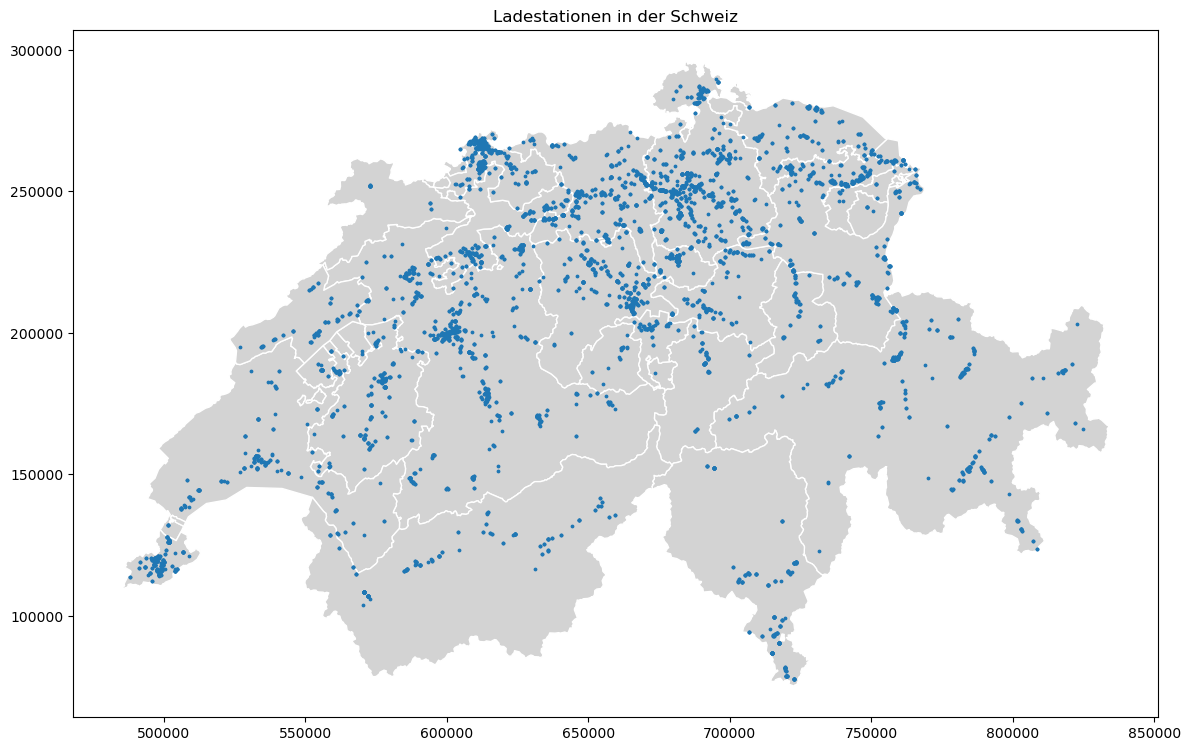

In [37]:
# Plot
ax = gdf_kantone.plot(figsize=(14,10), color='lightgrey', edgecolor='white')
gdf_within.plot(markersize=3, ax=ax)
ax.set_title("Ladestationen in der Schweiz")